## Projeto 1 

### 1 - Definição do problema de negócio 

<img width="633" height="112" style="display: block; margin-left: auto; margin-right: auto" src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

Queremos prever o preço de venda de um imóvel, e para isso utilizaremos dados históricos contendo algumas características dos imóveis e o valor por qual ele foi vendido. 

Fonte: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

### 2 - Pré-processamento dos dados 

Nesta estapa iremos realizar a **análise exploratória** dos dados e a uma **pré-preparação** dos dados para modelagem preditiva. 

#### 2.1 - Análise exploratória 

In [132]:
# Pacotes utilizados 
import pandas as pd 
import numpy as np 
import seaborn as sea
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
# Importando e verificando as dimensões do conjunto de dados.

df = pd.read_csv('dados/treino.csv')
df.shape

(1460, 81)

In [134]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Verificando valores missing

In [135]:
# Verificando se há valores missing (NaN) nas variáveis.

df_missing = pd.DataFrame(df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False), columns = ["qtd_nan"])
df_missing['porcentagem'] = round(df_missing['qtd_nan']*100/len(df),1)
df_missing

,qtd_nan,porcentagem
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


Removeremos as variáveis (colunas) cujo percentual de valores missing (NaN) seja maior que 40%. Assim sendo, as variáveis **PoolQC**, **MiscFeature**, **Alley**, **Fence** e **FireplaceQu** serão eliminadas. Também eliminaremos a variável **Id**, pois a mesma serve apenas para ordenação dos registros. 

In [136]:
df = df.drop(columns = 'Id')

In [137]:
# Verificando novamente
df = df.drop(columns = df_missing[df_missing['porcentagem'] > 40].index)
df_missing = pd.DataFrame(df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False), columns = ["qtd_nan"])
df_missing['porcentagem'] = round(df_missing['qtd_nan']*100/len(df),1)
df_missing.head()

,qtd_nan,porcentagem
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


A variável **LotFrontage** possui 17,7% de valores missing, portanto 17,7% dos registros do dataframe, uma quantidade considerável de linhas a serem removidas. Assim, iremos substituir esses valores NaN pela **média** dos valores da variável. 

In [138]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

Para as demais variáveis que possuem valores missing inferiores a 40% do total, excluiremos os registros (linhas) que possuem tais valores.

In [139]:
df = df.dropna()

In [140]:
# Dataframe sem nenhuma variável missing.

df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

In [141]:
# Verificando o dataframe 

print("Nº de registros: %d" % (df.shape[0]))
print("Nº de variáveis: %d" % (df.shape[1]))
df.head()

Nº de registros: 1338
Nº de variáveis: 75


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### Verificando o tipo das variáveis. 

In [142]:
# Variáveis quantitativas  
quant_var = df.dtypes[df.dtypes != "object"].index
print("São %d variáveis quantitativas(numéricas)." %(len(quant_var)))
quant_var

São 37 variáveis quantitativas(numéricas).


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [143]:
# Variáveis qualitativas   
qual_var = df.dtypes[df.dtypes == "object"].index
print("São %d variáveis categóricas." %(len(qual_var)))
qual_var 

São 38 variáveis categóricas.


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Agora iremos verificar se alguma das variáveis quantitativas podem ser uma variável do tipo qualitativa, ou seja, a variável possui elementos numéricos discretos que representam informação qualitativa. 
Consideraremos uma variável que possui até **20 elementos numéricos discretos** como uma variável qualitativa, denominada **variável numérico categórica**.

In [144]:
num_cat_var = 20

var_num_cat = []
for var in quant_var:
    if(len(pd.unique(df[var])) <= num_cat_var):
        var_num_cat.append(var)

print("O df possui %d variáveis quantitativas que representam categorias" % (len(var_num_cat)))     
var_num_cat

O df possui 18 variáveis quantitativas que representam categorias


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

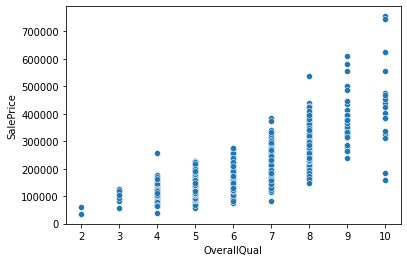

In [187]:
# Por exemplo, a variável OverallQual é numérica, mas representa categorias
sea.scatterplot(data = df, x = 'OverallQual', y = 'SalePrice')
plt.show()

1) Agora faremos um plot de dispersão entre as **variáveis numérico-categóricas** e a variável alvo **SalePrice**

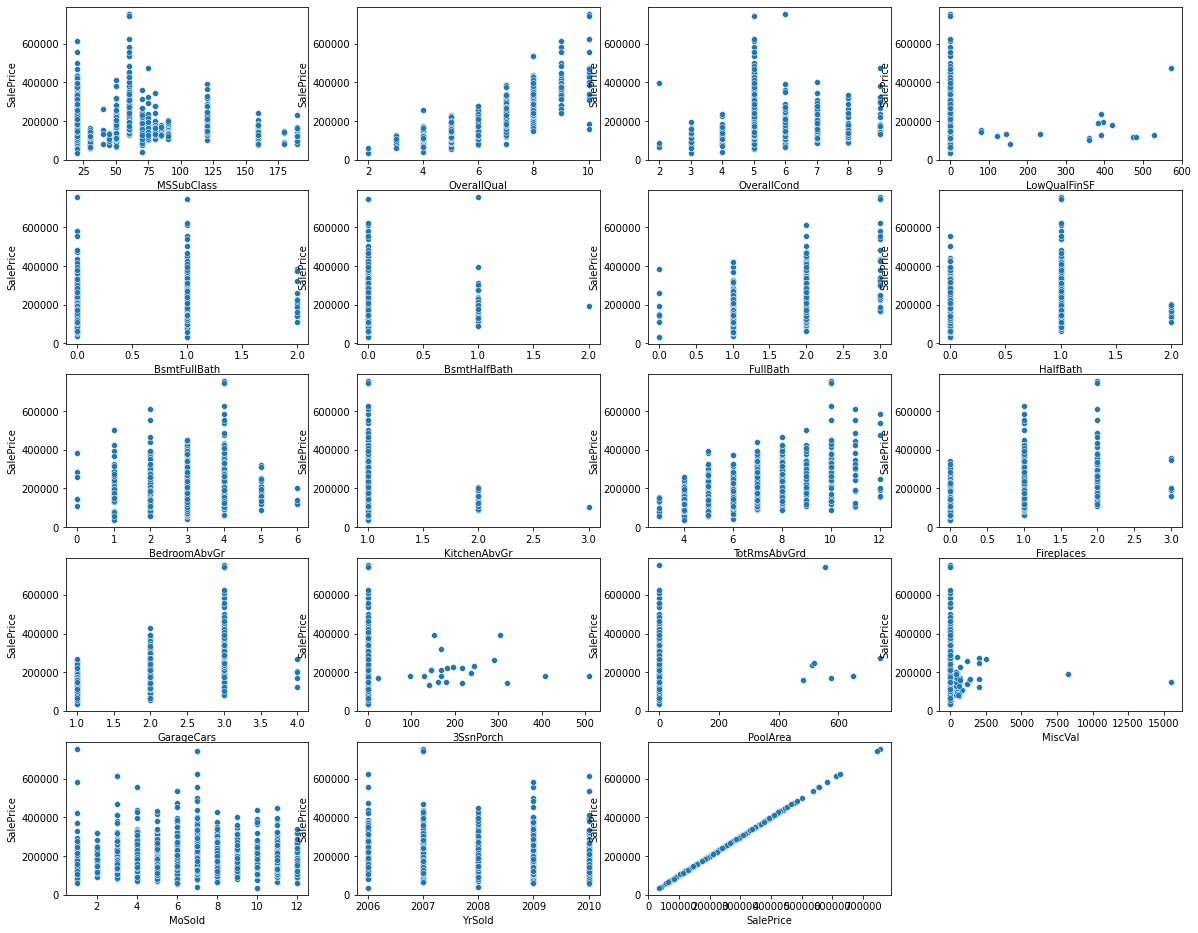

In [145]:
# Adicionando a variável alvo 
ncv = list(var_num_cat)
ncv.append('SalePrice')

df_num_cat = df[ncv]

plt.figure(figsize = (20,40))
x = 1
for variavel in df_num_cat.columns:
    plt.subplot(12, 4, x)
    sea.scatterplot(data = df, x = variavel, y = 'SalePrice')
    x += 1

Com base nos gráficos acima, podemos notar que as variáveis **LowQualFinSF**, **3SsnPorch**, **PoolArea** e **MiscVal** são variáveis quantitativas (contínuas). Removeremos elas da lista de variáveis numérico categóricas. 

In [19]:
var_num_cat = [item for item in var_num_cat if item not in ['LowQualFinSF', '3SsnPorch', 'PoolArea','MiscVal']]
var_num_cat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [63]:
# Atualizando a lista de variáveis categóricas.

qual_var = list(df.dtypes[df.dtypes == "object"].index) 
qual_var.extend(var_num_cat)
qual_var

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

Agora iremos adicionar as quatro variáveis **LowQualFinSF**, **3SsnPorch**, **PoolArea** e **MiscVal** e remover as variáveis presentes na lista de variáveis numérico categóricas, da lista de variáveis quantitativas.  

In [55]:
quant_var = list(df.dtypes[df.dtypes != "object"].index) 
quant_var.extend(['LowQualFinSF', '3SsnPorch', 'PoolArea','MiscVal'])
A = set(quant_var)
B = set(var_num_cat)
quant_var = list(A.difference(B))
quant_var

['2ndFlrSF',
 'YearBuilt',
 'PoolArea',
 'BsmtFinSF1',
 '1stFlrSF',
 'TotalBsmtSF',
 'OpenPorchSF',
 'GrLivArea',
 'BsmtFinSF2',
 'YearRemodAdd',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF',
 '3SsnPorch',
 'SalePrice',
 'ScreenPorch',
 'MiscVal',
 'GarageArea',
 'BsmtUnfSF',
 'EnclosedPorch',
 'LowQualFinSF',
 'GarageYrBlt',
 'LotArea']

2) Agora faremos um plot de dispersão entre as **variáveis quantitativas** e a variável alvo **SalePrice**

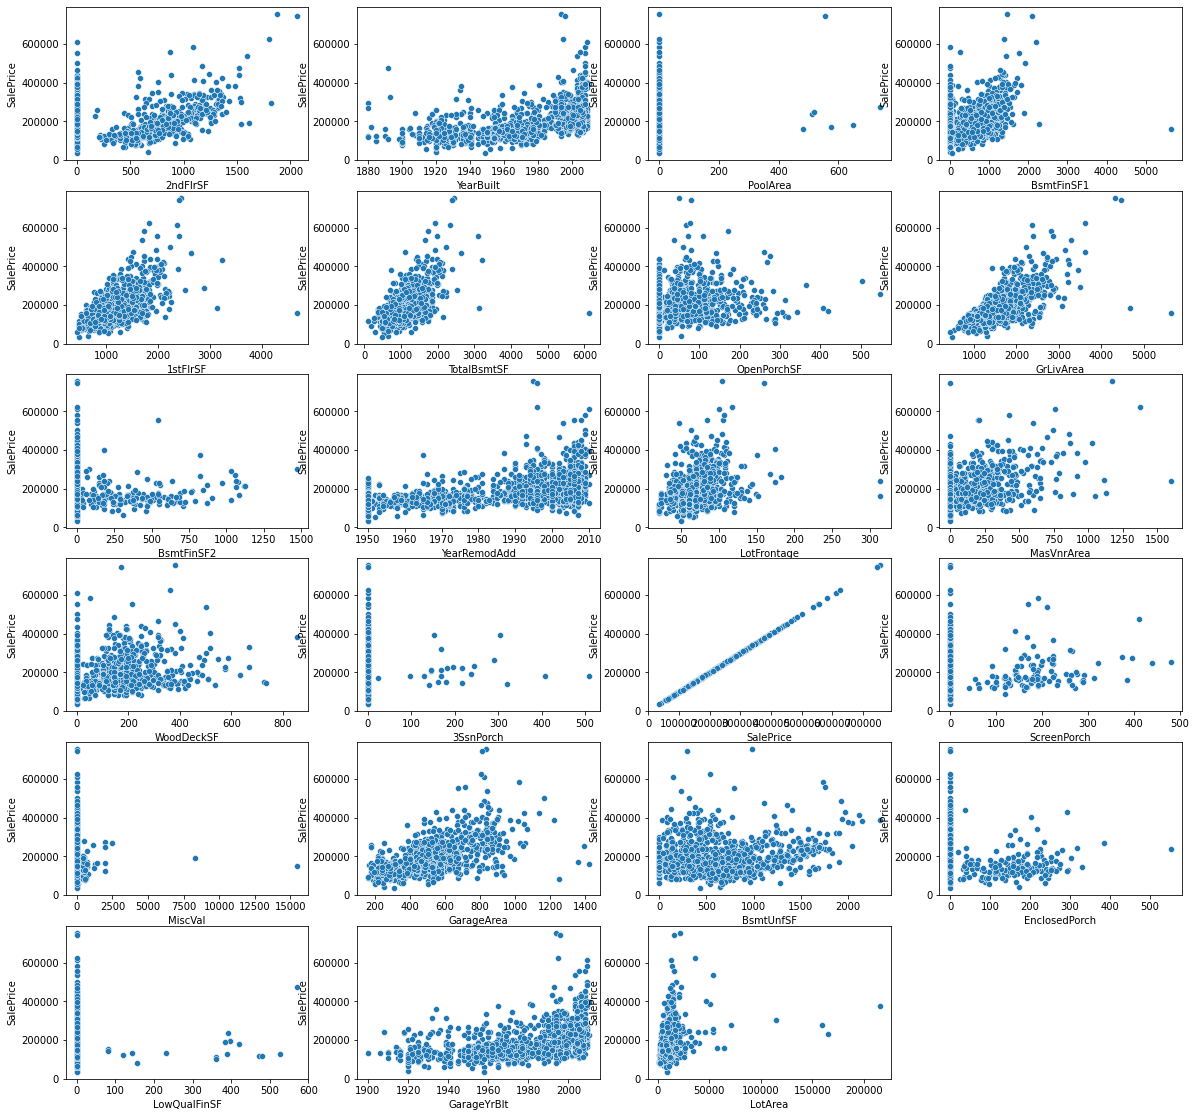

In [56]:
df_quant_var = df[quant_var]

plt.figure(figsize = (20,40))
x = 1
for variavel in df_quant_var.columns:
    plt.subplot(12, 4, x)
    sea.scatterplot(data = df, x = variavel, y = 'SalePrice')
    x += 1

3) Agora faremos um plot de dispersão entre as **variáveis qualitativas** e a variável alvo **SalePrice**

In [64]:
# Acrescentando a variável alvo no dataframe de variáveis categóricas. 
qual_var.append('SalePrice')

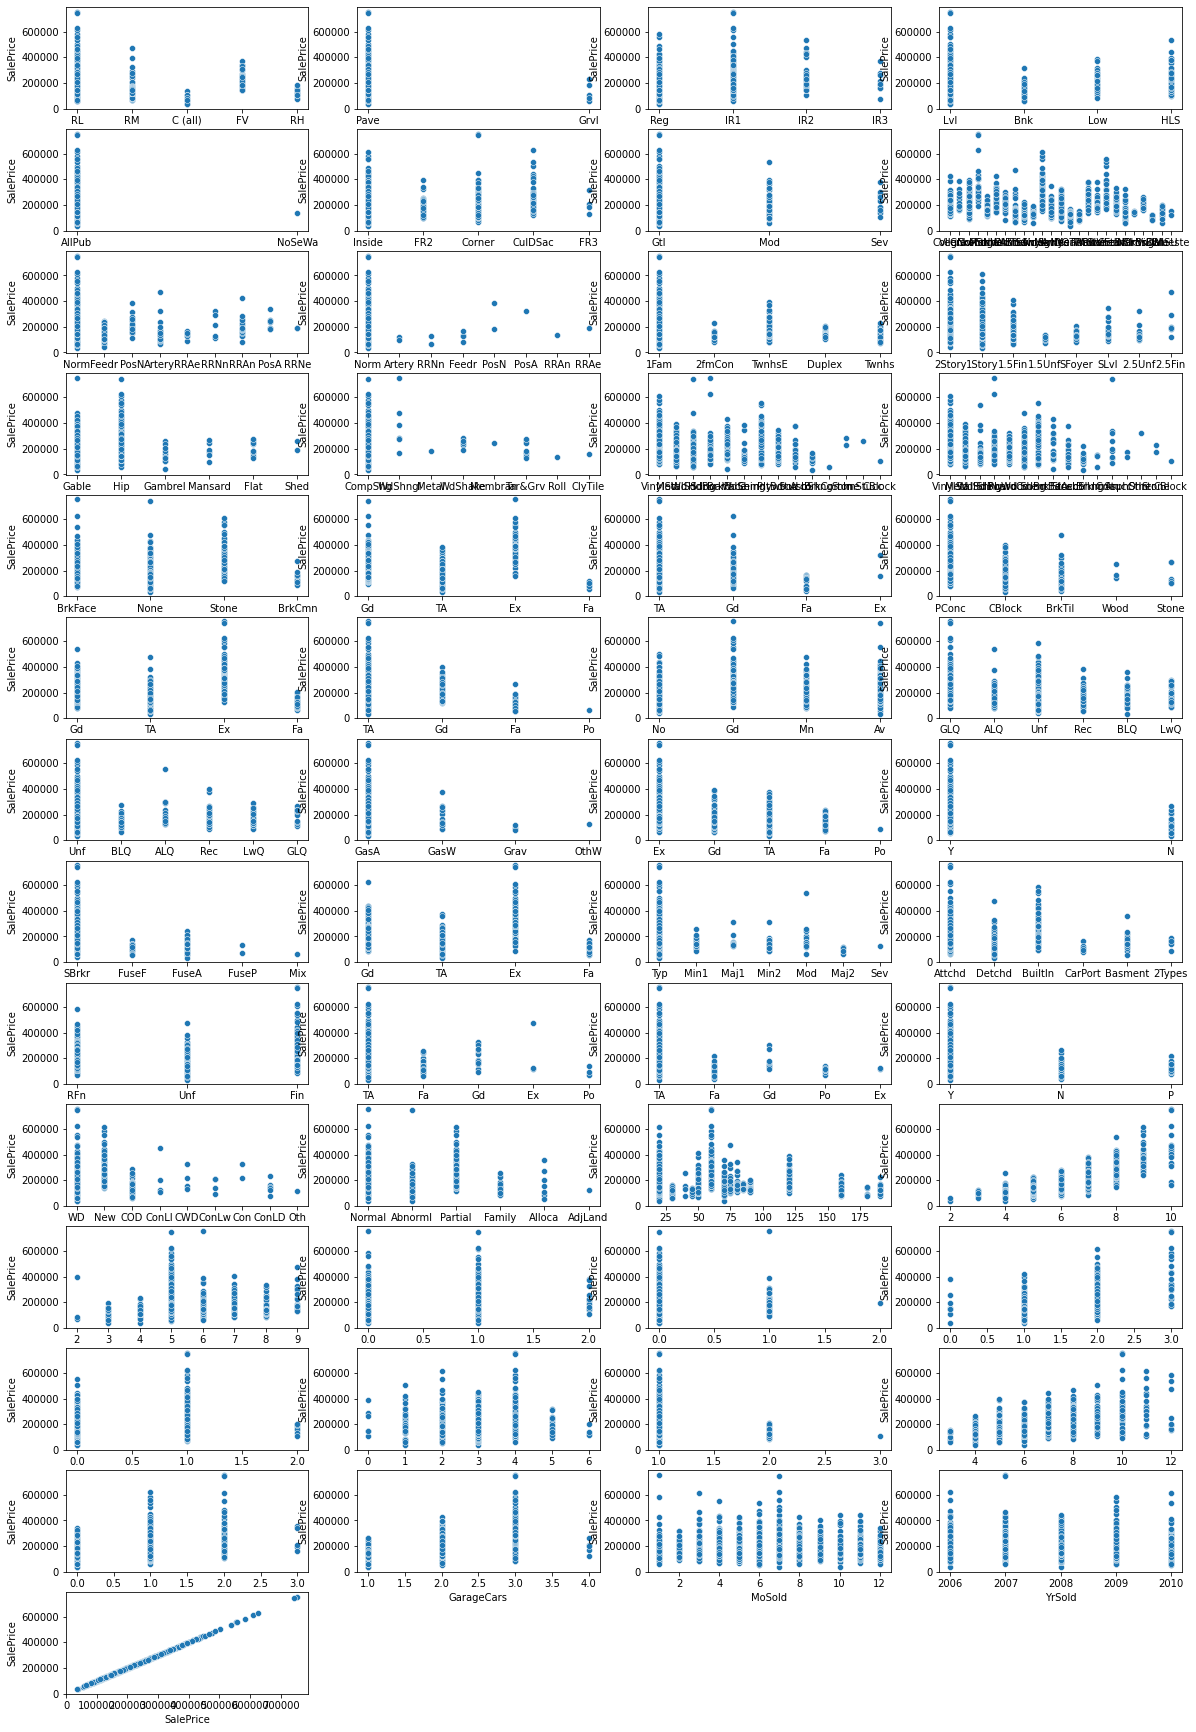

In [69]:
df_qual_var = df[qual_var]

plt.figure(figsize = (20,40))
x = 1
for variavel in df_qual_var.columns:
    plt.subplot(18, 4, x)
    sea.scatterplot(data = df, x = variavel, y = 'SalePrice')
    x += 1

#### Informações obtidas após as manipulações 

O dataframe possui:
    
    I) 23 variáveis quantitativas (incluindo a variável alvo).
    II) 52 variáveis qualitativas. 
    III) Nº de registros: 1338

Note que algumas das variáveis qualitativas são do tipo "object", ou seja, texto. Esse tipo de informação não pode ser apresentada aos algoritmos de aprendizado de máquina, logo devemos alterar isso, para números discretos. 

In [89]:
# Exemplo da função pd.get_dummies() do pandas. 

df2 = df[['MSZoning','Street']]
print("Categorias: ", pd.unique(df2['MSZoning']))
print("Categorias: ", pd.unique(df2['Street']))
df2.head()

Categorias:  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Categorias:  ['Pave' 'Grvl']


,MSZoning,Street
0,RL,Pave
1,RL,Pave
2,RL,Pave
3,RL,Pave
4,RL,Pave


In [90]:
# Se torna: 
df2 = pd.get_dummies(df2, drop_first = False)
df2.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave
0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,1
2,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1
4,0,0,0,1,0,0,1


Transformando todas variáveis qualitativas com dados em texto em variáveis qualitativas representadas por **valores discretos**.

In [91]:
df2 = df 
df2 = pd.get_dummies(df2, drop_first = False)
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


#### Análise das variáveis quantitativas 

In [93]:
df_quant_var = df[quant_var]
df_quant_var.head()

,2ndFlrSF,YearBuilt,PoolArea,BsmtFinSF1,1stFlrSF,TotalBsmtSF,OpenPorchSF,GrLivArea,BsmtFinSF2,YearRemodAdd,...,3SsnPorch,SalePrice,ScreenPorch,MiscVal,GarageArea,BsmtUnfSF,EnclosedPorch,LowQualFinSF,GarageYrBlt,LotArea
0,854,2003,0,706,856,856,61,1710,0,2003,...,0,208500,0,0,548,150,0,0,2003.0,8450
1,0,1976,0,978,1262,1262,0,1262,0,1976,...,0,181500,0,0,460,284,0,0,1976.0,9600
2,866,2001,0,486,920,920,42,1786,0,2002,...,0,223500,0,0,608,434,0,0,2001.0,11250
3,756,1915,0,216,961,756,35,1717,0,1970,...,0,140000,0,0,642,540,272,0,1998.0,9550
4,1053,2000,0,655,1145,1145,84,2198,0,2000,...,0,250000,0,0,836,490,0,0,2000.0,14260


In [104]:
# Dimensões 

df_quant_var.shape

(1338, 23)

In [97]:
# Nome e tipo das variáveis 

df_quant_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1338 non-null   int64  
 1   YearBuilt      1338 non-null   int64  
 2   PoolArea       1338 non-null   int64  
 3   BsmtFinSF1     1338 non-null   int64  
 4   1stFlrSF       1338 non-null   int64  
 5   TotalBsmtSF    1338 non-null   int64  
 6   OpenPorchSF    1338 non-null   int64  
 7   GrLivArea      1338 non-null   int64  
 8   BsmtFinSF2     1338 non-null   int64  
 9   YearRemodAdd   1338 non-null   int64  
 10  LotFrontage    1338 non-null   float64
 11  MasVnrArea     1338 non-null   float64
 12  WoodDeckSF     1338 non-null   int64  
 13  3SsnPorch      1338 non-null   int64  
 14  SalePrice      1338 non-null   int64  
 15  ScreenPorch    1338 non-null   int64  
 16  MiscVal        1338 non-null   int64  
 17  GarageArea     1338 non-null   int64  
 18  BsmtUnfS

In [106]:
# Resumo estatístico básico. 

df_quant_var.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
2ndFlrSF,1338.0,357.1,440.3,0.0,0.0,0.0,740.5,2065.0
YearBuilt,1338.0,1973.0,29.6,1880.0,1956.0,1976.0,2001.0,2010.0
PoolArea,1338.0,3.0,42.0,0.0,0.0,0.0,0.0,738.0
BsmtFinSF1,1338.0,464.2,458.8,0.0,0.0,413.0,733.0,5644.0
1stFlrSF,1338.0,1176.2,386.6,438.0,894.0,1098.0,1414.0,4692.0
TotalBsmtSF,1338.0,1095.9,405.6,105.0,819.8,1021.5,1324.0,6110.0
OpenPorchSF,1338.0,47.8,65.4,0.0,0.0,28.0,70.0,547.0
GrLivArea,1338.0,1537.6,520.6,438.0,1160.0,1480.0,1791.5,5642.0
BsmtFinSF2,1338.0,49.2,166.2,0.0,0.0,0.0,0.0,1474.0
YearRemodAdd,1338.0,1985.7,20.3,1950.0,1968.0,1994.5,2004.0,2010.0


In [129]:
df_quant_var.corr().round(1)

,2ndFlrSF,YearBuilt,PoolArea,BsmtFinSF1,1stFlrSF,TotalBsmtSF,OpenPorchSF,GrLivArea,BsmtFinSF2,YearRemodAdd,...,3SsnPorch,SalePrice,ScreenPorch,MiscVal,GarageArea,BsmtUnfSF,EnclosedPorch,LowQualFinSF,GarageYrBlt,LotArea
2ndFlrSF,1.0,0.0,0.1,-0.2,-0.2,-0.2,0.2,0.7,-0.1,0.1,...,-0.0,0.3,0.0,0.0,0.1,-0.0,0.1,0.0,0.1,0.0
YearBuilt,0.0,1.0,0.0,0.2,0.3,0.4,0.2,0.2,-0.1,0.6,...,0.0,0.5,-0.1,-0.0,0.4,0.1,-0.4,-0.2,0.8,-0.0
PoolArea,0.1,0.0,1.0,0.1,0.1,0.1,0.1,0.2,0.0,0.0,...,-0.0,0.1,0.0,0.0,0.1,-0.0,0.1,0.1,-0.0,0.1
BsmtFinSF1,-0.2,0.2,0.1,1.0,0.5,0.5,0.1,0.2,-0.1,0.1,...,0.0,0.4,0.1,0.0,0.3,-0.6,-0.1,-0.1,0.1,0.2
1stFlrSF,-0.2,0.3,0.1,0.5,1.0,0.9,0.2,0.6,0.1,0.2,...,0.1,0.6,0.1,-0.0,0.5,0.3,-0.1,-0.0,0.2,0.3
TotalBsmtSF,-0.2,0.4,0.1,0.5,0.9,1.0,0.3,0.5,0.1,0.3,...,0.0,0.6,0.1,-0.0,0.5,0.4,-0.1,-0.1,0.3,0.3
OpenPorchSF,0.2,0.2,0.1,0.1,0.2,0.3,1.0,0.3,0.0,0.2,...,-0.0,0.3,0.1,-0.0,0.3,0.1,-0.1,0.0,0.2,0.1
GrLivArea,0.7,0.2,0.2,0.2,0.6,0.5,0.3,1.0,-0.0,0.3,...,0.0,0.7,0.1,0.0,0.5,0.2,0.0,0.1,0.2,0.3
BsmtFinSF2,-0.1,-0.1,0.0,-0.1,0.1,0.1,0.0,-0.0,1.0,-0.1,...,-0.0,-0.0,0.1,0.0,-0.1,-0.2,0.0,0.0,-0.1,0.1
YearRemodAdd,0.1,0.6,0.0,0.1,0.2,0.3,0.2,0.3,-0.1,1.0,...,0.0,0.5,-0.1,-0.0,0.4,0.2,-0.2,-0.1,0.6,0.0


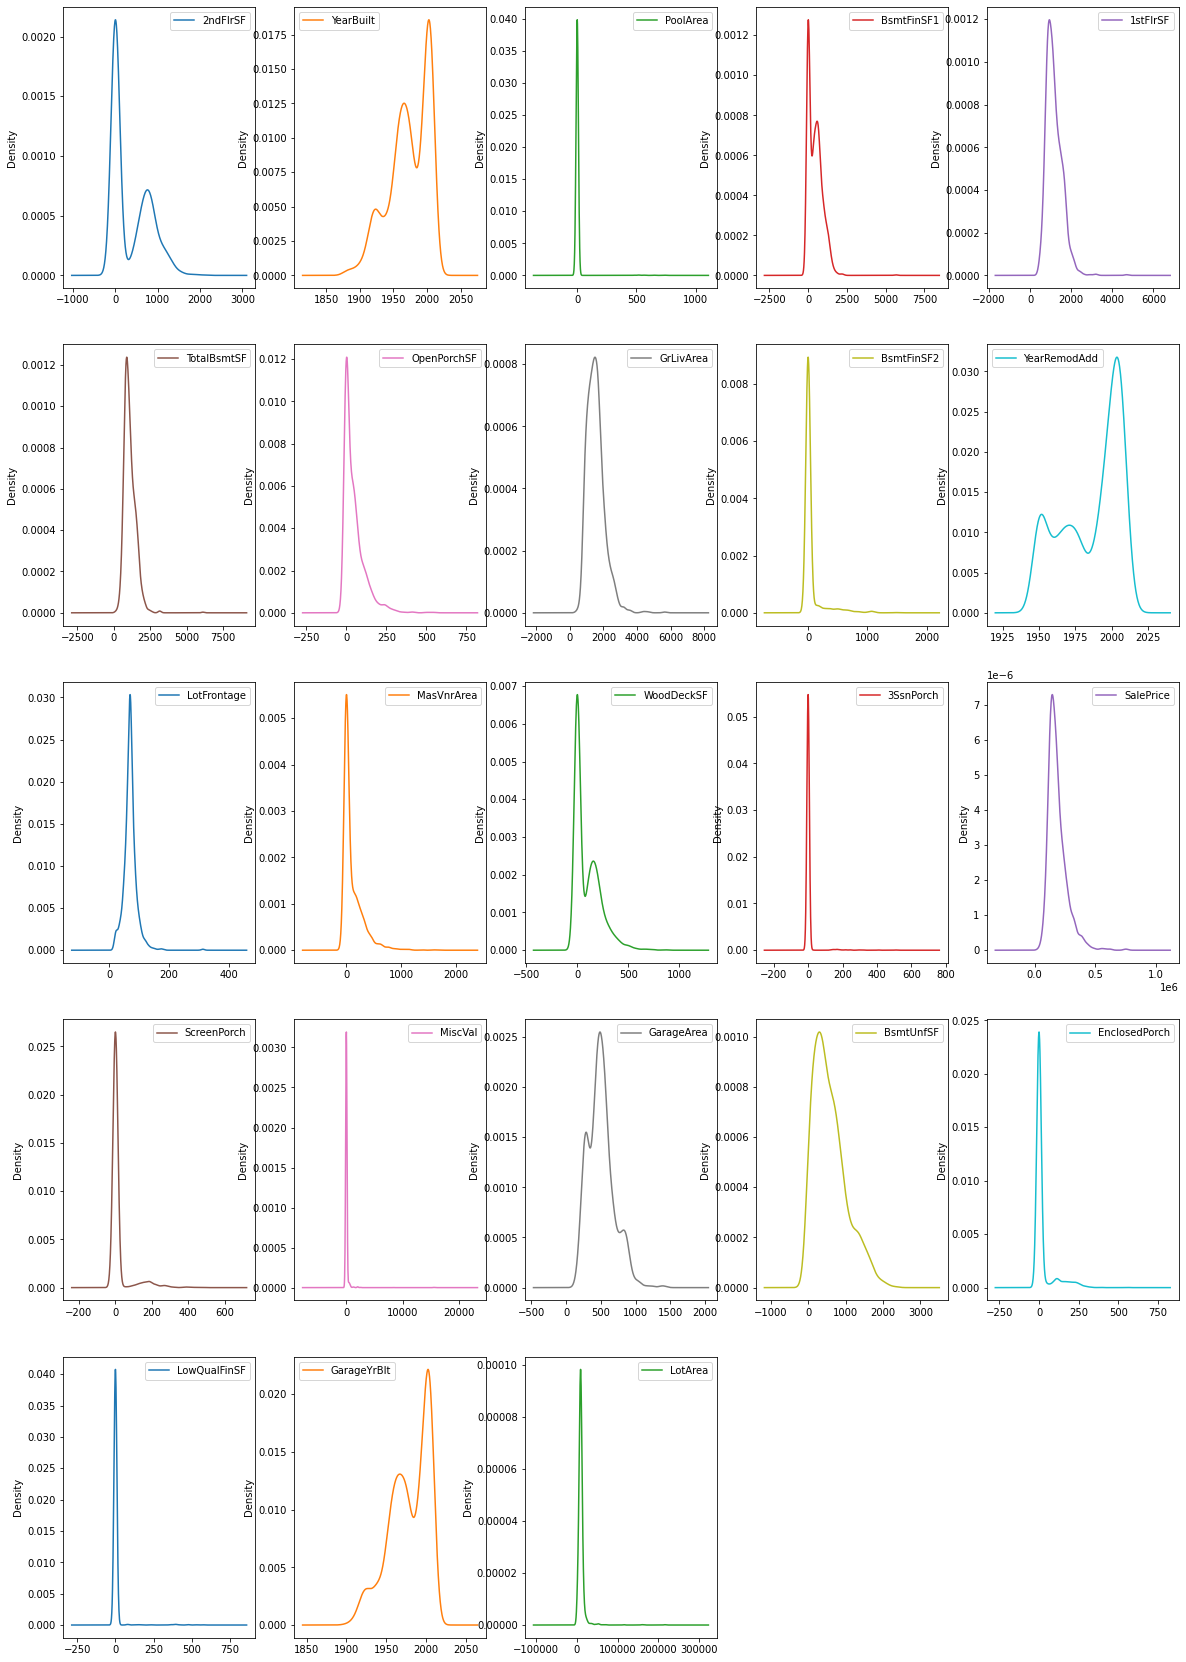

In [108]:
# O density plot facilita a visualização da distribuição dos dados.

df_quant_var.plot(kind = 'density', figsize = (20,30), layout = (5,5), subplots = True, sharex = False)
plt.show()

Identificando outliers 

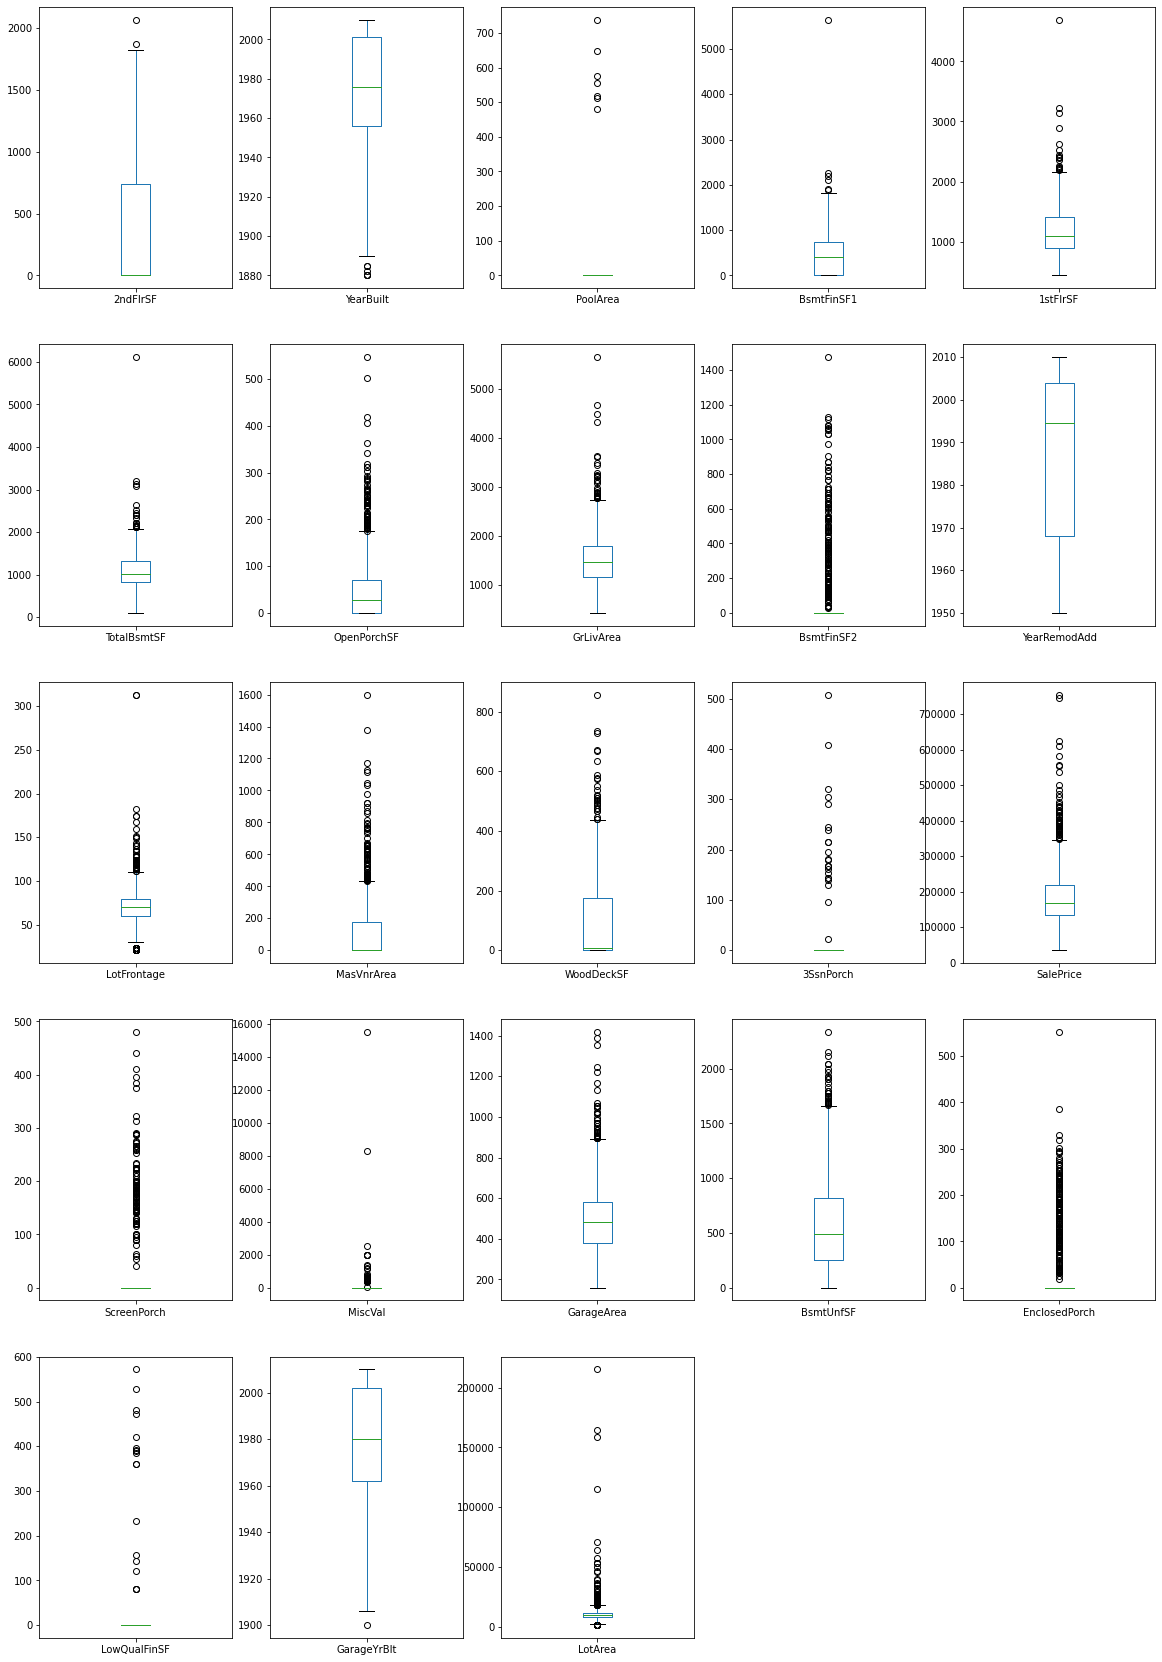

In [109]:
df_quant_var.plot(kind = 'box', figsize = (20,30), layout = (5,5), subplots = True, sharex = False)
plt.show()

In [131]:
# Porcentagem de valores extremos em cada variável. 
# Criei uma função para me informar sobre a quantidade de elementos acima do limite superior e abaixo do limite inferior. 

def qtd_outliers(df):
    # Função criada para retornar um dict com a qtd de outliers.
    # Retorna a qtd acima do lim sup e abaixo do lim inf. 
    dic = {}
    for i in df.columns:
    
        q3 = df[i].quantile(q = 0.75)
        q1 = df[i].quantile(q = 0.25)
        
        sup_outlier = q3 + (3/2)*(q3-q1) 
        inf_outlier = q1 - (3/2)*(q3-q1)

        qtd_sup = len(df[i][df[i] > sup_outlier])
        qtd_inf = len(df[i][df[i] < inf_outlier])
    
        dic[i] = [qtd_sup, qtd_inf]
    return dic 

# Dataframe com a qtq de outliers acima do limite superior e abaixo do limite inferior 

outliers = qtd_outliers(df_quant_var)
tabela_outliers = pd.DataFrame(outliers, index = ['Superior', 'Inferior'])
tabela_outliers

,2ndFlrSF,YearBuilt,PoolArea,BsmtFinSF1,1stFlrSF,TotalBsmtSF,OpenPorchSF,GrLivArea,BsmtFinSF2,YearRemodAdd,...,3SsnPorch,SalePrice,ScreenPorch,MiscVal,GarageArea,BsmtUnfSF,EnclosedPorch,LowQualFinSF,GarageYrBlt,LotArea
Superior,2,0,7,6,17,20,65,29,162,0,...,23,56,116,47,38,29,183,18,0,63
Inferior,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13


Medidas de forma 

In [110]:
# Assimetria 

df_quant_var.skew()

2ndFlrSF          0.769147
YearBuilt        -0.677966
PoolArea         14.187832
BsmtFinSF1        1.693397
1stFlrSF          1.397431
TotalBsmtSF       2.214029
OpenPorchSF       2.250952
GrLivArea         1.430307
BsmtFinSF2        4.146519
YearRemodAdd     -0.563345
LotFrontage       2.479517
MasVnrArea        2.582685
WoodDeckSF        1.481740
3SsnPorch        10.096553
SalePrice         1.943686
ScreenPorch       3.916848
MiscVal          24.632578
GarageArea        0.807078
BsmtUnfSF         0.935363
EnclosedPorch     3.205286
LowQualFinSF     10.566815
GarageYrBlt      -0.669457
LotArea          11.938124
dtype: float64

In [111]:
# Curtose 

df_quant_var.kurt()

2ndFlrSF          -0.623164
YearBuilt         -0.337735
PoolArea         204.262059
BsmtFinSF1        11.630118
1stFlrSF           6.058740
TotalBsmtSF       18.372875
OpenPorchSF        7.628230
GrLivArea          5.324558
BsmtFinSF2        18.985684
YearRemodAdd      -1.187460
LotFrontage       22.818422
MasVnrArea         9.454536
WoodDeckSF         2.795283
3SsnPorch        118.289227
SalePrice          6.815307
ScreenPorch       16.541519
MiscVal          694.307395
GarageArea         1.171789
BsmtUnfSF          0.481728
EnclosedPorch     11.314761
LowQualFinSF     115.763183
GarageYrBlt       -0.392226
LotArea          191.844258
dtype: float64

#### Conclusão parcial 

Com base nas medidas estatísticas básicas e na análise dos gráficos de distribuição e boxplots , notamos que:

    I) Algumas variáveis deverão receber uma tranformação para melhorar a distribuição dos dados (medidas de forma). 
    
    II) O dataframe deverá ser normalizado e padronizado, afim de deixar todas as variáveis em uma escala comum. 

    III) Algumas variáveis serão analisadas em mais detalhes para definir se os valores extremos fazem sentido ou não (esta  etapa poderia ser feita com auxílio da área de negócio em um problema real).  
    
    IV) Outliers deverão ser tratados.
    
Variáveis a serem analisadas em mais detalhes: PoolArea, BsmtFinSF1, TotalBsmtSF, OpenPorchSF, GrLivArea, LotFrontage, 3SsnPorch, ScreenPorch, MiscVal, EnclosedPorch, LowQualFinSF, LotArea.           

#### Salvando análises e transformações.

In [127]:
df.to_csv('dados/df_bruto.csv', index = False)
df2.to_csv('dados/df_transf.csv', index = False)